In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'colab'
%matplotlib inline

# Loading the dataset

In [2]:
dfc=pd.read_csv(r"C:\Users\YOUSSEF\Stroke-Detection\Stroke\healthcare-dataset-stroke-data.csv")


In [3]:
dfc.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
dfc.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# changing the titles

In [5]:
dfc.columns = dfc.columns.str.title()
dfc.rename(columns={'Bmi': 'BMI', 'Sex': 'Gender'}, inplace=True)
dfc.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [6]:
dfc.drop(['Id'], axis=1, inplace=True)

In [7]:
dfc.drop(dfc[dfc['Gender'] == 'Other'].index, inplace=True)


In [8]:
dfc.dropna(inplace=True)

In [9]:
dfc['BMI']

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: BMI, Length: 4908, dtype: float64

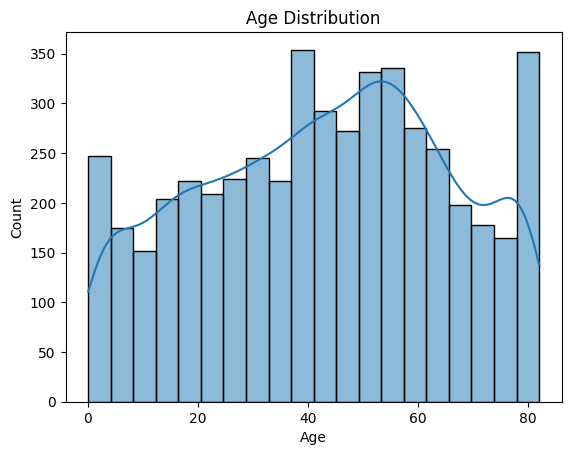

In [10]:
sns.histplot(dfc['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

In [11]:
Q1 = dfc['BMI'].quantile(0.25)
Q3 = dfc['BMI'].quantile(0.75)
IQR = Q3 - Q1

x = Q1 - 3 * IQR
y = Q3 + 3 * IQR

outliers = dfc[(dfc['BMI'] < x) | (dfc['BMI'] > y)]
outliers

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
358,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
544,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
2764,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0
4188,Female,27.0,0,0,Yes,Private,Rural,57.96,64.4,never smoked,0
4209,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


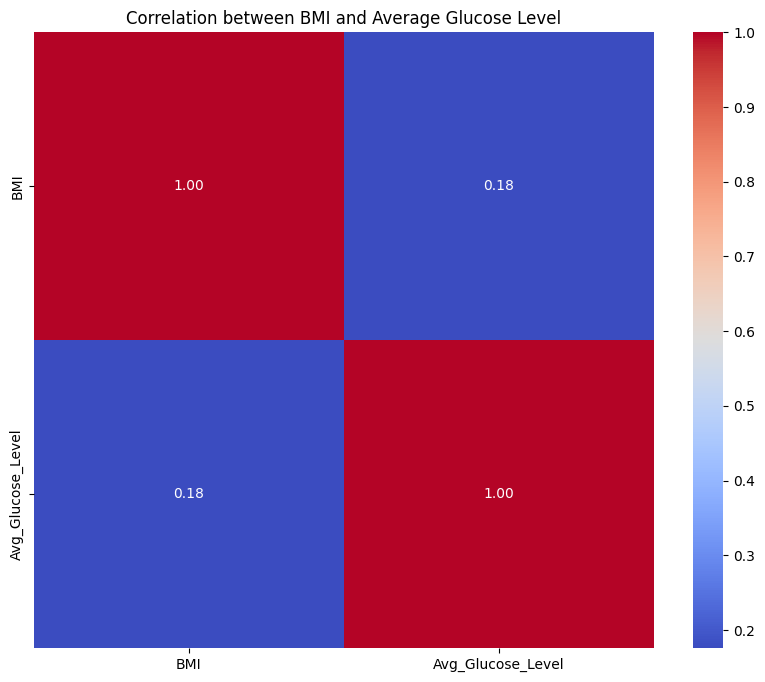

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfc[['BMI', 'Avg_Glucose_Level']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between BMI and Average Glucose Level')
plt.show()

In [13]:
correlation_positive = dfc[dfc['Stroke'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
correlation_negative = dfc[dfc['Stroke'] == 0][['BMI', 'Avg_Glucose_Level']].corr()

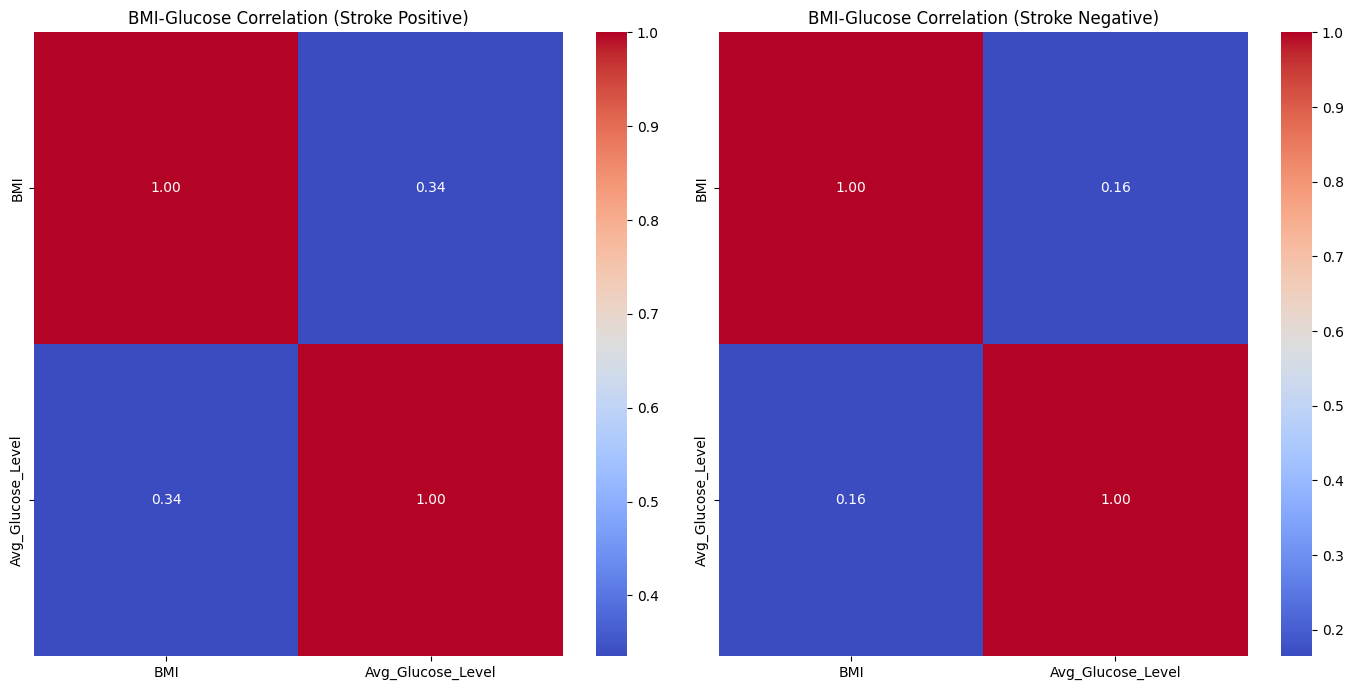

In [14]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_positive, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Stroke Positive)')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_negative, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Stroke Negative)')

plt.tight_layout()
plt.show()


In [15]:
htcorrelation_positive = dfc[dfc['Hypertension'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
htcorrelation_negative = dfc[dfc['Hypertension'] == 0][['BMI', 'Avg_Glucose_Level']].corr()

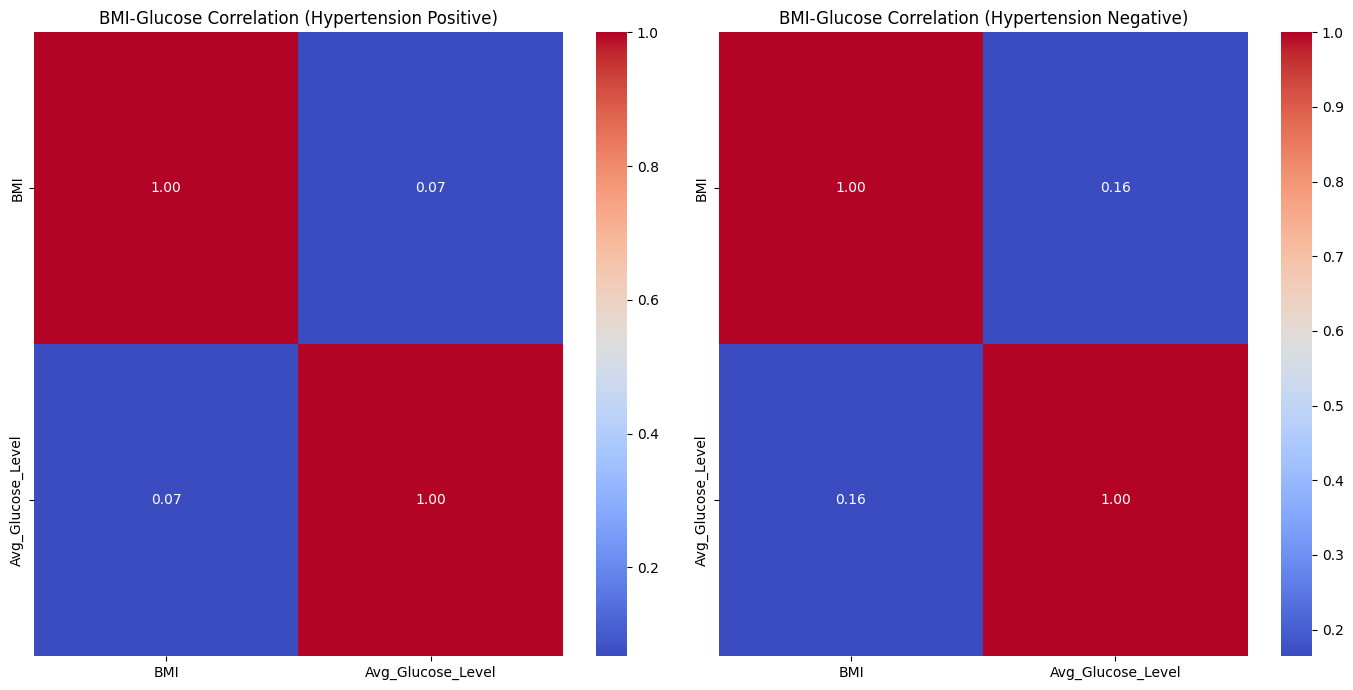

In [16]:
htcorrelation_positive = dfc[dfc['Hypertension'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
htcorrelation_negative = dfc[dfc['Hypertension'] == 0][['BMI', 'Avg_Glucose_Level']].corr()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(htcorrelation_positive, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Hypertension Positive)')

plt.subplot(1, 2, 2)
sns.heatmap(htcorrelation_negative, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Hypertension Negative)')

plt.tight_layout()
plt.show()

In [17]:
hdcorrelation_positive = dfc[dfc['Heart_Disease'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
hdcorrelation_negative = dfc[dfc['Heart_Disease'] == 0][['BMI', 'Avg_Glucose_Level']].corr()

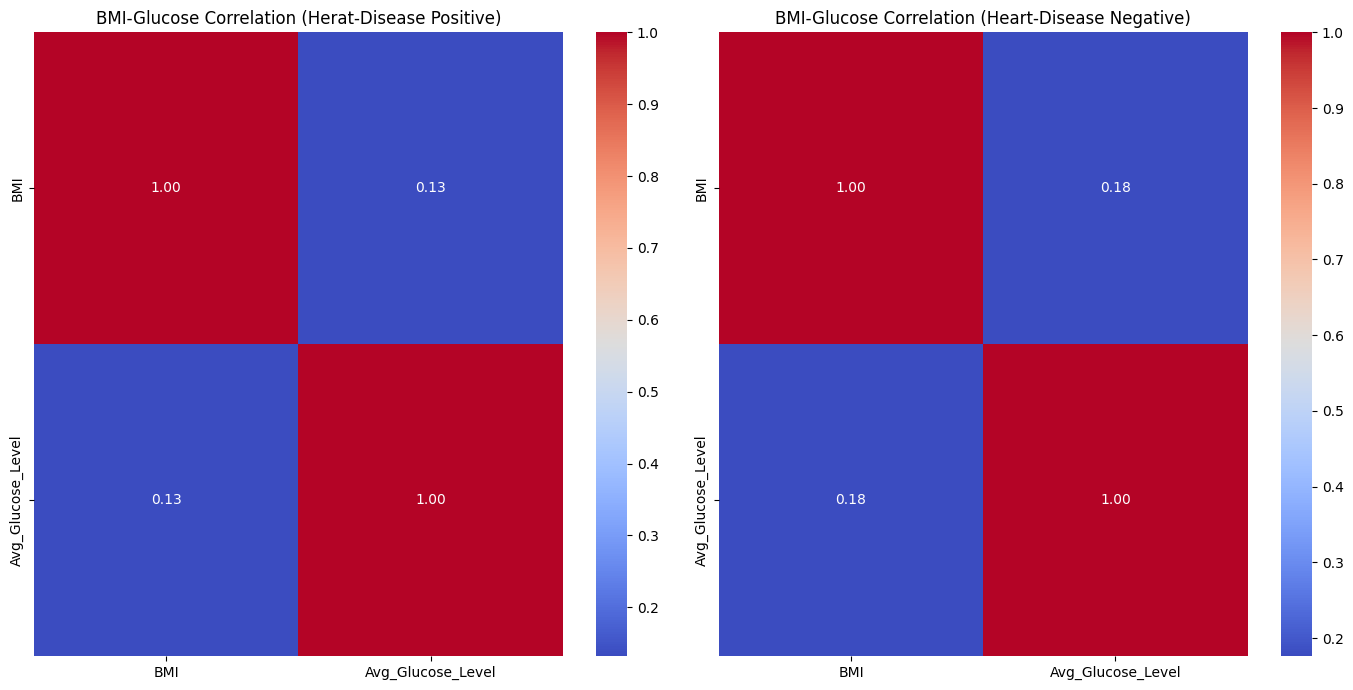

In [18]:
hdcorrelation_positive = dfc[dfc['Heart_Disease'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
hdcorrelation_negative = dfc[dfc['Heart_Disease'] == 0][['BMI', 'Avg_Glucose_Level']].corr()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(hdcorrelation_positive, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Herat-Disease Positive)')

plt.subplot(1, 2, 2)
sns.heatmap(hdcorrelation_negative, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Heart-Disease Negative)')

plt.tight_layout()
plt.show()

In [19]:
dfc['Hypertension'].value_counts()

Hypertension
0    4457
1     451
Name: count, dtype: int64

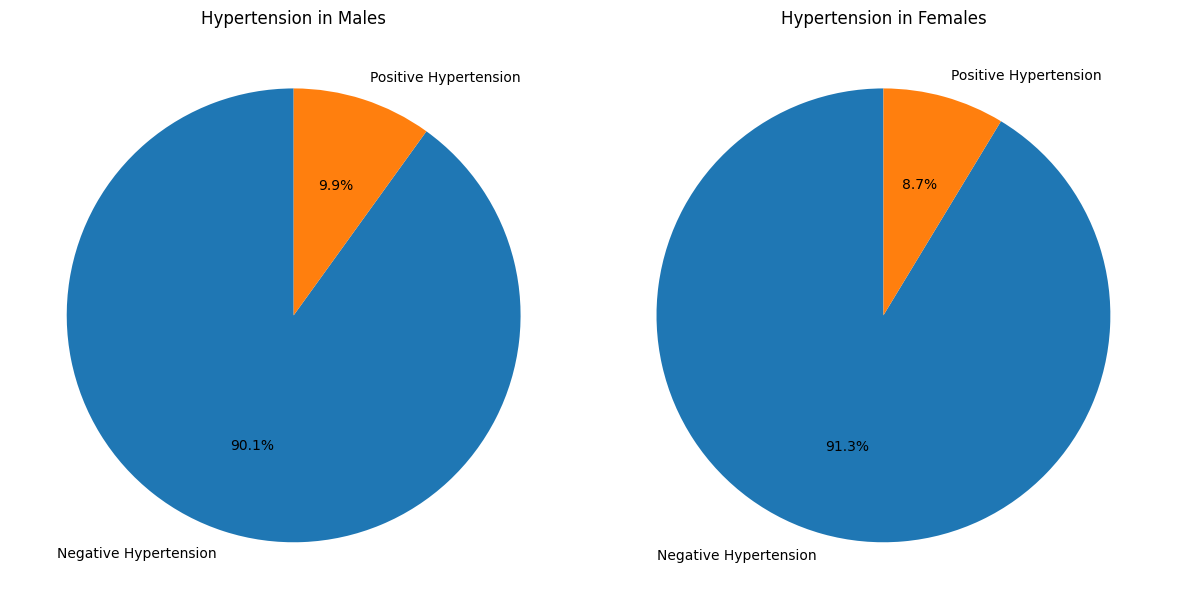

In [20]:
# Create the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for males
male_data = dfc[dfc['Gender'] == 'Male']['Hypertension'].value_counts()
male_labels = ['Negative Hypertension', 'Positive Hypertension']
axes[0].pie(male_data, labels=male_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Hypertension in Males')

# Pie chart for females
female_data = dfc[dfc['Gender'] == 'Female']['Hypertension'].value_counts()
female_labels = ['Negative Hypertension', 'Positive Hypertension']
axes[1].pie(female_data, labels=female_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Hypertension in Females')

plt.tight_layout()
plt.show()

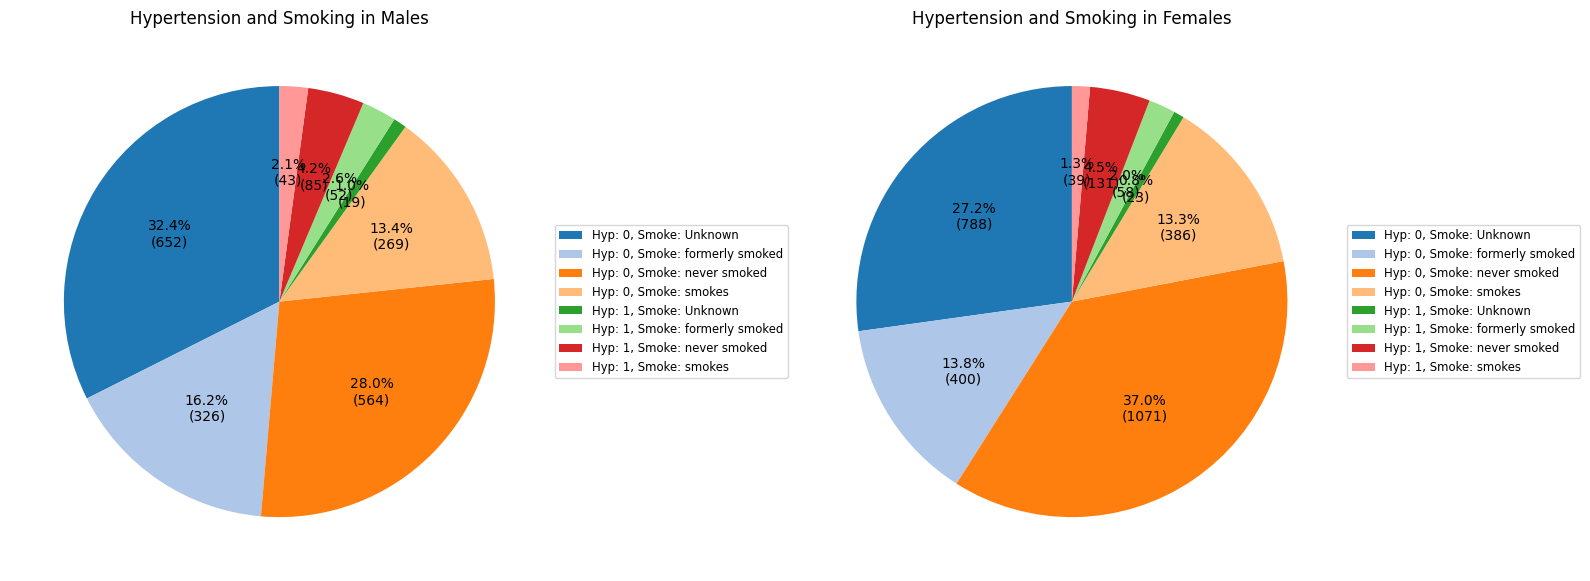

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping and preparing data
male_data = dfc[dfc['Gender'] == 'Male'].groupby(['Hypertension', 'Smoking_Status']).size()
female_data = dfc[dfc['Gender'] == 'Female'].groupby(['Hypertension', 'Smoking_Status']).size()

# Labels for the legend (shortened for clarity)
male_labels = [f"Hyp: {h}, Smoke: {s}" for (h, s) in male_data.index]
female_labels = [f"Hyp: {h}, Smoke: {s}" for (h, s) in female_data.index]

# Colors for the slices
colors = plt.cm.tab20.colors

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Males
axes[0].pie(
    male_data,
    labels=None,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(male_data) / 100)})',
    startangle=90,
    colors=colors
)
axes[0].set_title('Hypertension and Smoking in Males')
axes[0].legend(male_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Pie chart for Females
axes[1].pie(
    female_data,
    labels=None,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(female_data) / 100)})',
    startangle=90,
    colors=colors
)
axes[1].set_title('Hypertension and Smoking in Females')
axes[1].legend(female_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Layout adjustment
plt.tight_layout()
plt.show()


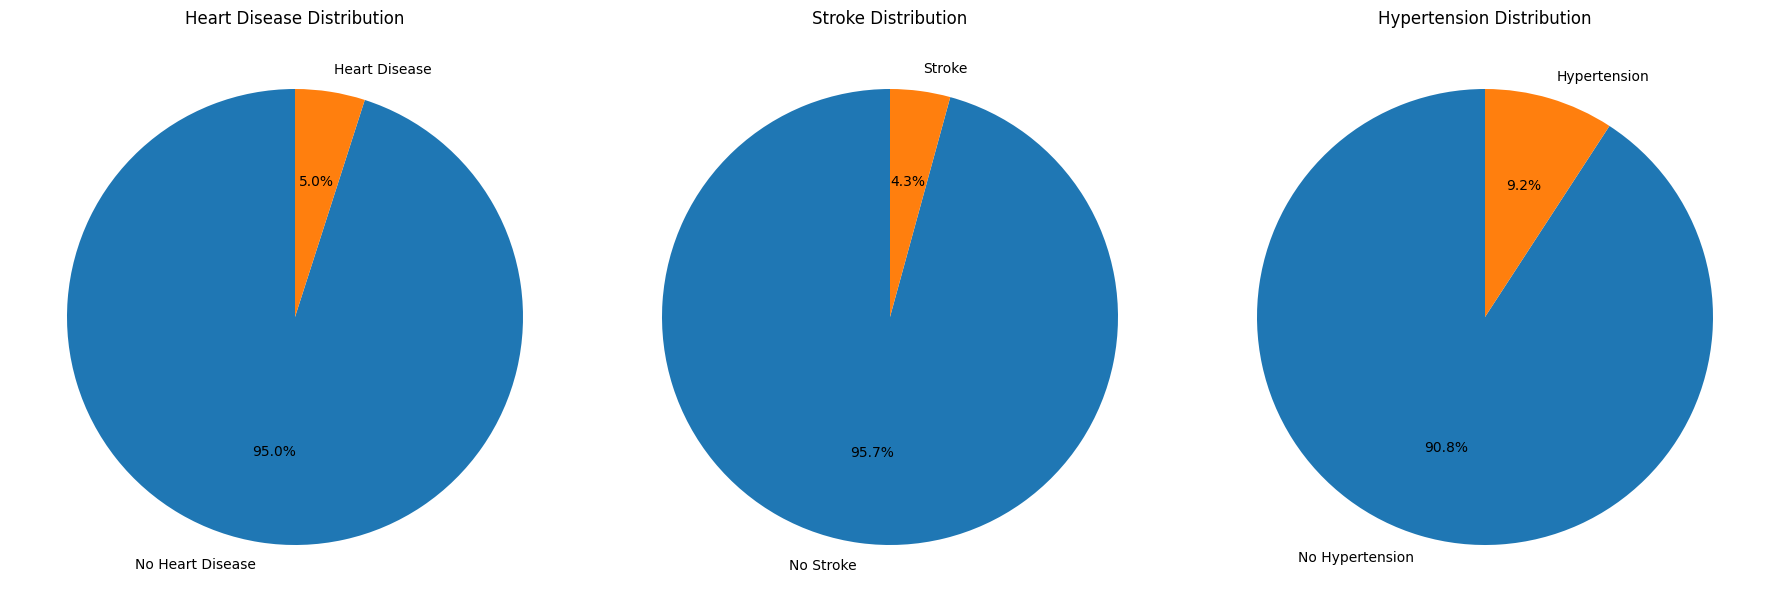

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Heart Disease
heart_disease_data = dfc['Heart_Disease'].value_counts()
heart_disease_labels = ['No Heart Disease', 'Heart Disease']
axes[0].pie(heart_disease_data, labels=heart_disease_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Heart Disease Distribution')

# Pie chart for Stroke
stroke_data = dfc['Stroke'].value_counts()
stroke_labels = ['No Stroke', 'Stroke']
axes[1].pie(stroke_data, labels=stroke_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Stroke Distribution')

# Pie chart for Hypertension (from your existing code)
hypertension_data = dfc['Hypertension'].value_counts()
hypertension_labels = ['No Hypertension', 'Hypertension']
axes[2].pie(hypertension_data, labels=hypertension_labels, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Hypertension Distribution')


plt.tight_layout()
plt.show()

In [23]:
dfc_grouped1 = dfc.groupby(['Hypertension', 'Stroke']).size().unstack(fill_value=0)
dfc_grouped_percent1 = dfc_grouped1.div(dfc_grouped1.sum(axis=1), axis=0) * 100

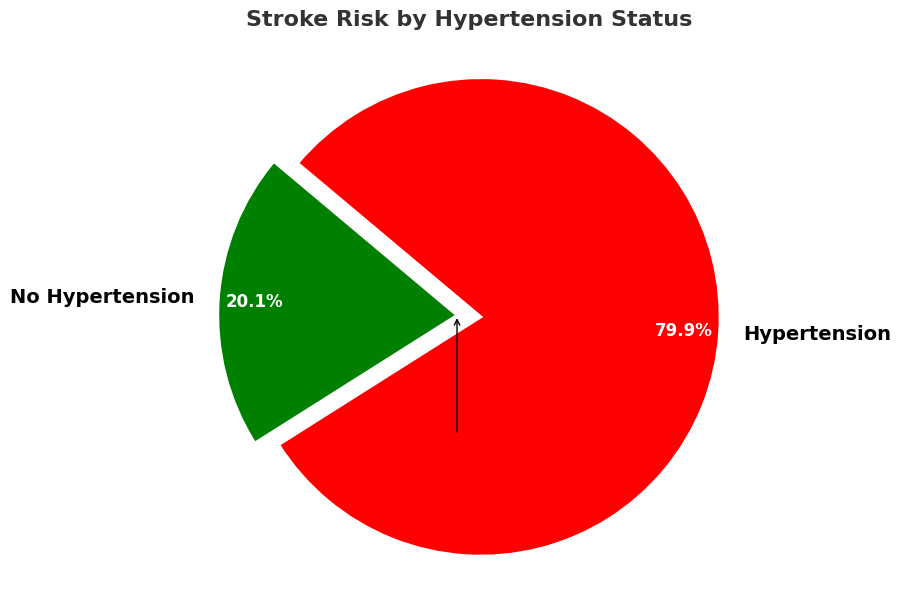

In [24]:
labels = ['No Hypertension', 'Hypertension']
sizes = dfc_grouped_percent1[1]
colors = ['green', 'red']
explode = [0, 0.1]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'linestyle': 'solid'}
)
plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=14, weight="bold", color='black')
ax.set_title('Stroke Risk by Hypertension Status', fontsize=16, weight='bold', color='#333333', pad=20)

ax.annotate('', xy=(0, 0), xytext=(0, -0.5),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))

ax.axis('equal')

plt.tight_layout()
plt.show()

In [25]:
dfc_grouped = dfc.groupby(['Heart_Disease', 'Stroke']).size().unstack(fill_value=0)
dfc_grouped_percent = dfc_grouped.div(dfc_grouped.sum(axis=1), axis=0) * 100

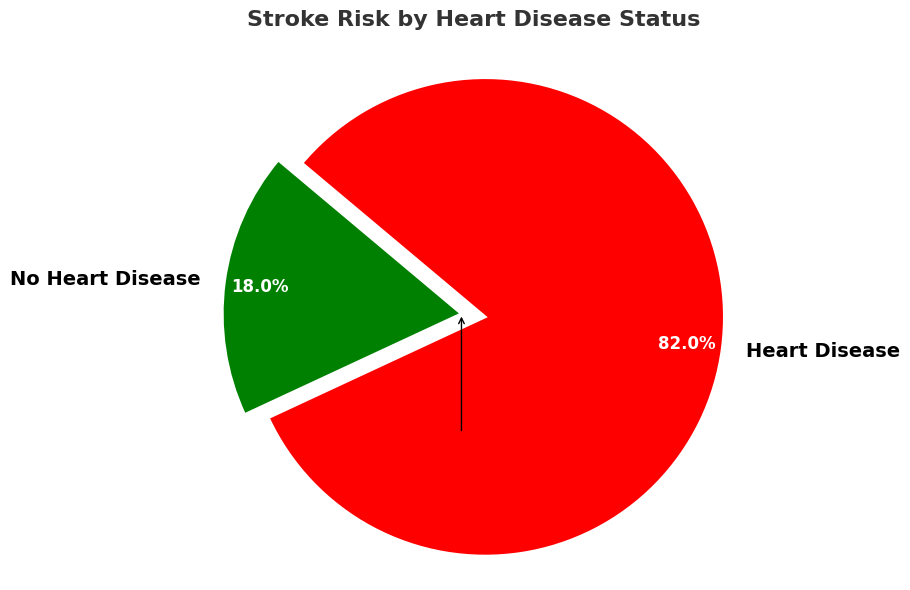

In [26]:
labels = ['No Heart Disease', 'Heart Disease']
sizes = dfc_grouped_percent[1]
colors = ['green', 'red']
explode = [0, 0.1]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'linestyle': 'solid'}
)
plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=14, weight="bold", color='black')
ax.set_title('Stroke Risk by Heart Disease Status', fontsize=16, weight='bold', color='#333333', pad=20)

ax.annotate('', xy=(0, 0), xytext=(0, -0.5),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))

ax.axis('equal')

plt.tight_layout()
plt.show()

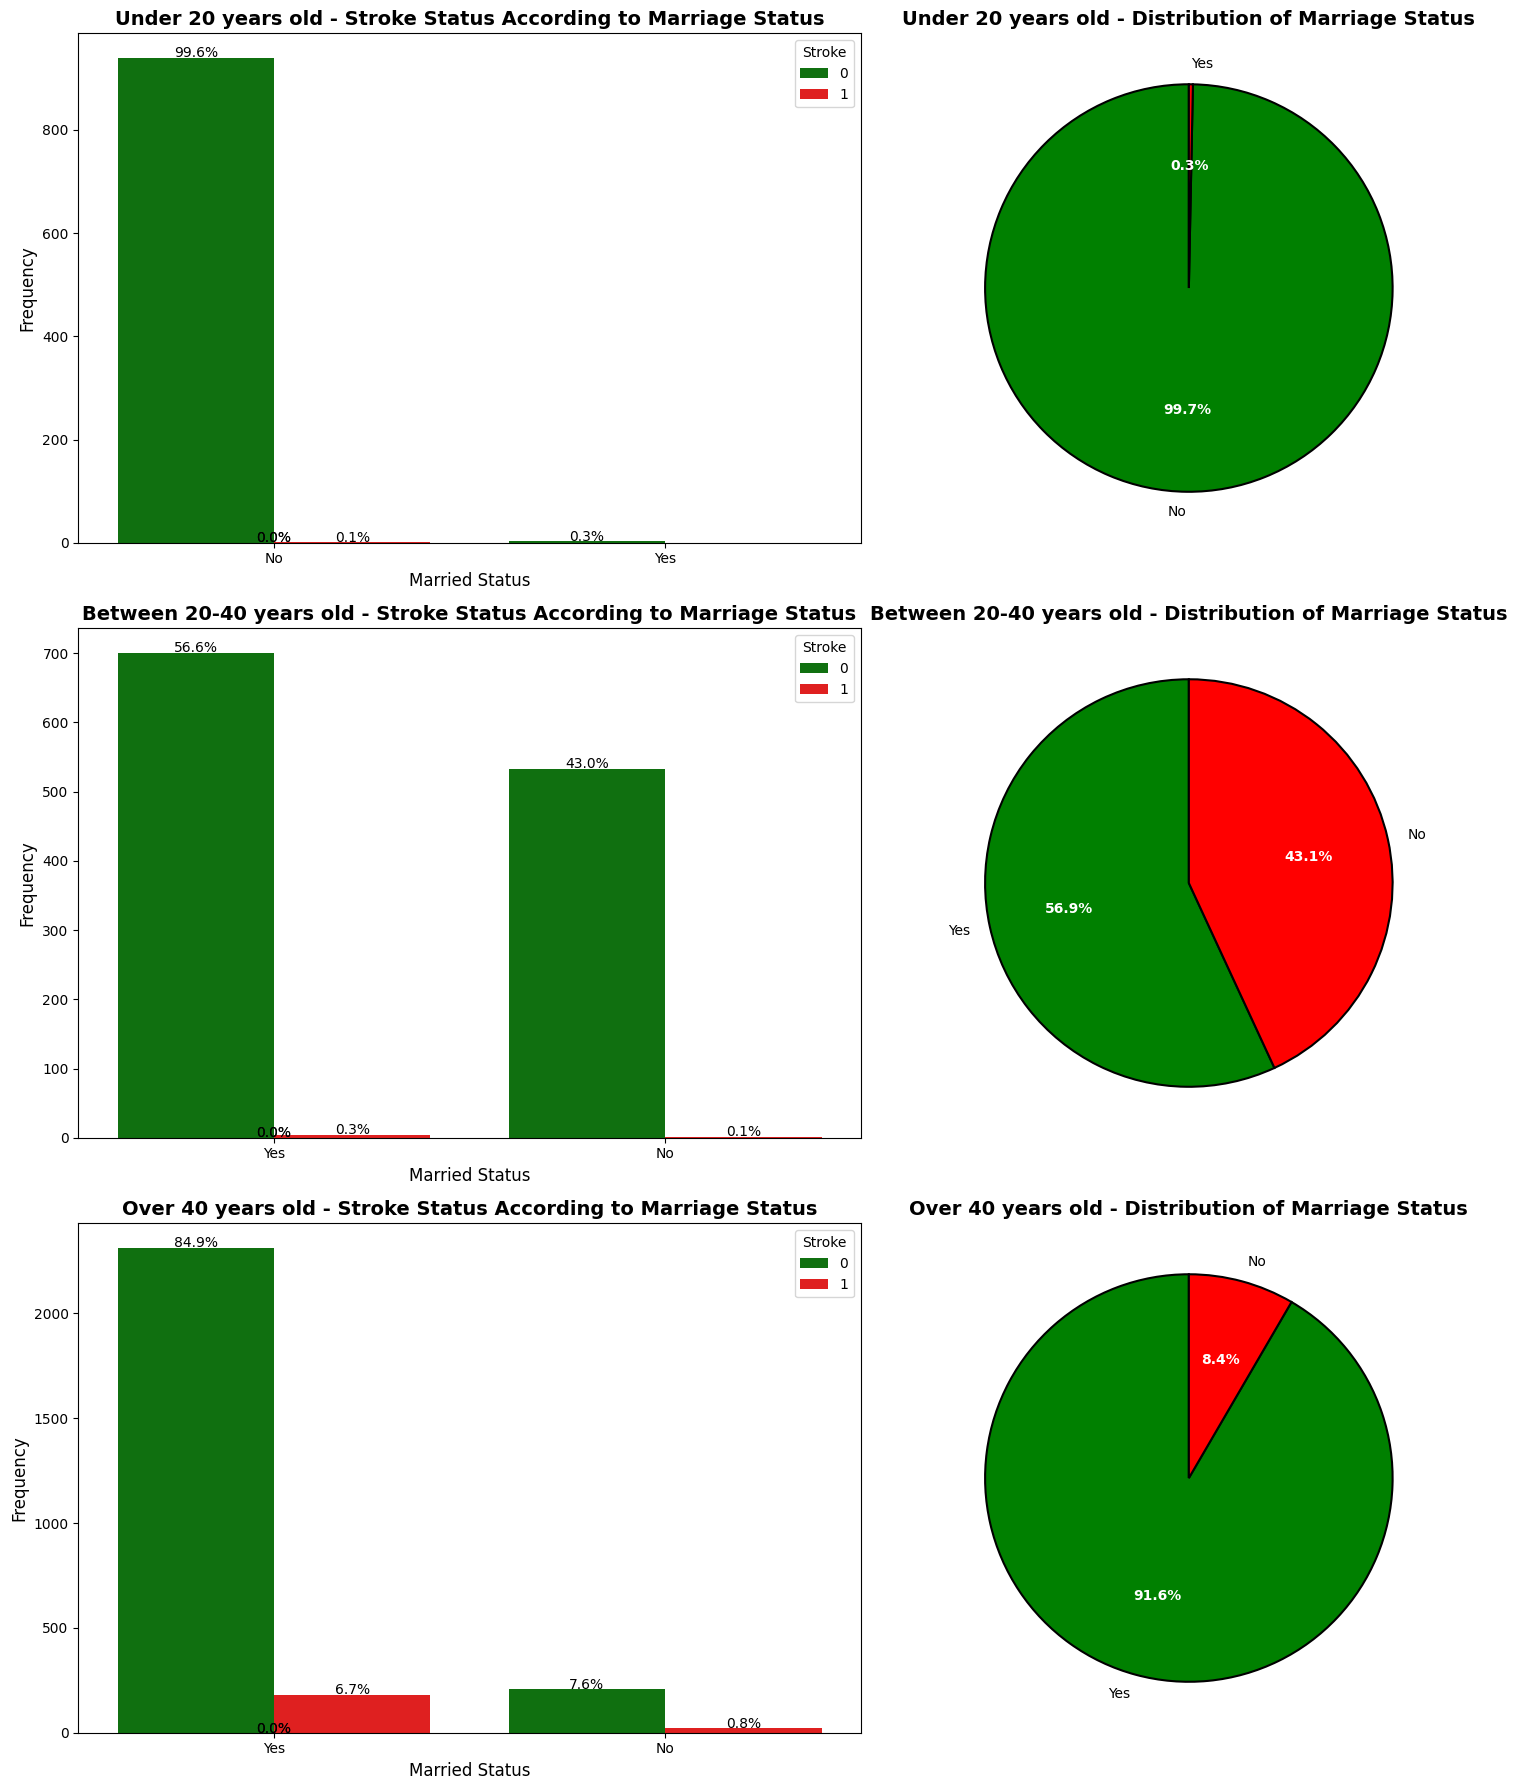

In [27]:
under_20 = dfc[dfc['Age'] < 20]
between_20_40 = dfc[(dfc['Age'] >= 20) & (dfc['Age'] <= 40)]
over_40 = dfc[dfc['Age'] > 40]

age_groups = {
    "Under 20 years old": under_20,
    "Between 20-40 years old": between_20_40,
    "Over 40 years old": over_40
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

custom_palette = ["green", "red"]

for idx, (group_name, group_data) in enumerate(age_groups.items()):
    ever_married_value = group_data['Ever_Married'].value_counts()
    countplot = sns.countplot(data=group_data,
                              x='Ever_Married',
                              palette=custom_palette,
                              ax=axes[idx][0],
                              hue='Stroke')
    axes[idx][0].set_title(f'{group_name} - Stroke Status According to Marriage Status', fontsize=14, fontweight='bold')
    axes[idx][0].set_xlabel('Married Status', fontsize=12)
    axes[idx][0].set_ylabel('Frequency', fontsize=12)

    total = len(group_data)
    for p in countplot.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        countplot.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%', ha="center", fontsize=10)

    wedges, texts, autotexts = axes[idx][1].pie(
        ever_married_value,
        labels=ever_married_value.index,
        colors=custom_palette,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
    )
    axes[idx][1].set_title(f'{group_name} - Distribution of Marriage Status', fontsize=14, fontweight='bold')

    for text in texts:
        text.set_color("black")
    for autotext in autotexts:
        autotext.set_color("white")
        autotext.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [28]:
stress_analysis = round(dfc.groupby('Work_Type')[['Hypertension', 'Stroke']].mean() * 100,2)
stress_analysis = stress_analysis.rename(columns={'Hypertension': 'Hypertension Rate (%)', 'Stroke': 'Stroke Rate (%)'})

fig = px.imshow(stress_analysis.T,
                labels={'x': 'Work Type', 'y': 'Indicator'},
                x=stress_analysis.index,
                y=stress_analysis.columns,
                color_continuous_scale=['pink', 'red'],
                color_continuous_midpoint=50,
                title='High Blood Pressure , SMOKING and Stroke Rates by Job Type',
                text_auto=True,
                height=600, width=800)

fig.update_layout(
    title_font_size=24,
    title_font_family="Arial, sans-serif",
    title_font_color='black',
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    font=dict(family="Arial, sans-serif", size=12, color='black'),
    coloraxis_colorbar=dict(title='Rate (%)', tickvals=[0, 50, 100], ticktext=['0%', '50%', '100%'])
)

# Use py.iplot for rendering in the notebook
fig.show()

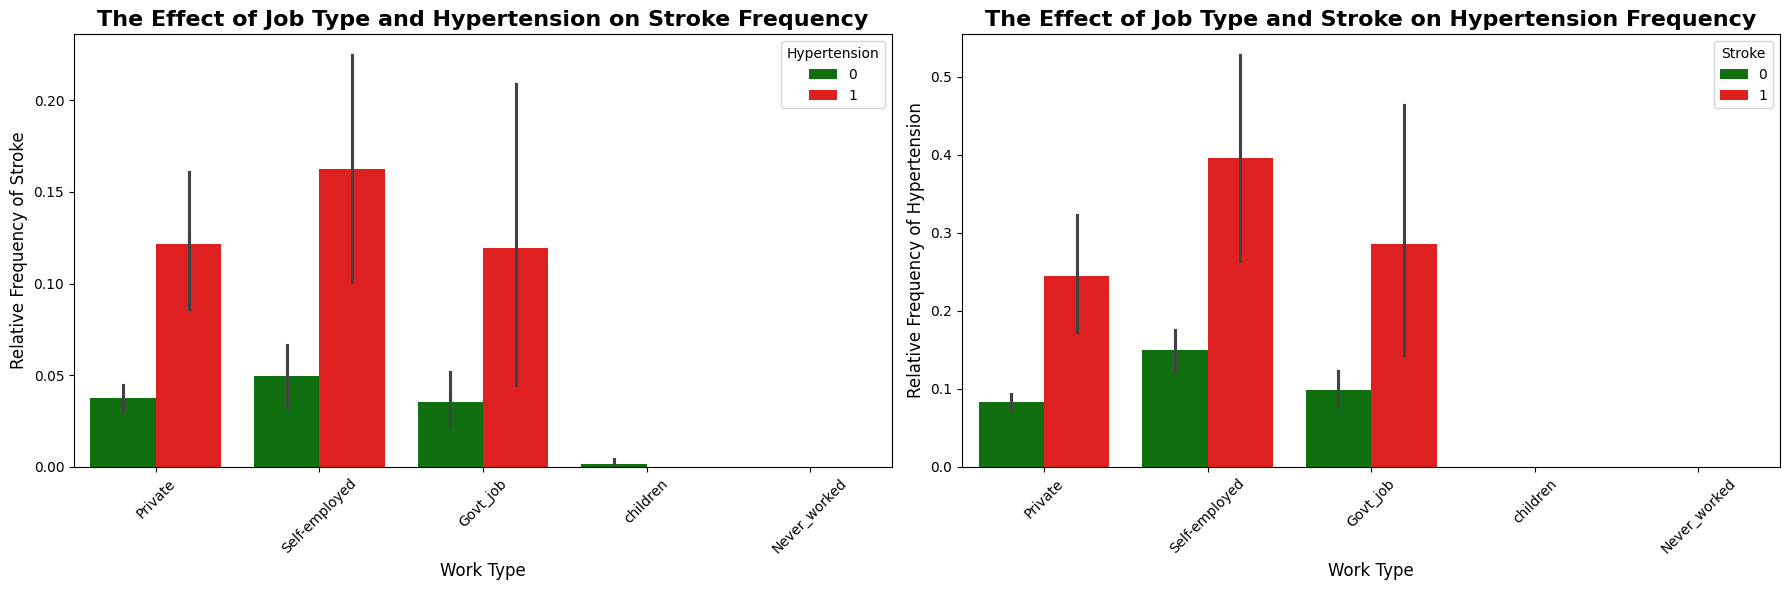

In [29]:
palette = {0: 'green', 1: 'red'}

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Work_Type', y='Stroke', hue='Hypertension', data=dfc, palette=palette, ax=axes[0])
axes[0].set_title('The Effect of Job Type and Hypertension on Stroke Frequency', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Work Type', fontsize=12)
axes[0].set_ylabel('Relative Frequency of Stroke', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x='Work_Type',
    y='Hypertension',
    hue='Stroke',
    data=dfc,
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('The Effect of Job Type and Stroke on Hypertension Frequency', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Work Type', fontsize=12)
axes[1].set_ylabel('Relative Frequency of Hypertension', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

# Modeling Time

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import joblib
import pickle  

import warnings
warnings.filterwarnings("ignore")

# Encoder

In [31]:
encode =LabelEncoder()

In [32]:
gender_encoder = LabelEncoder()
ever_married_encoder = LabelEncoder()
work_type_encoder = LabelEncoder()
residence_type_encoder = LabelEncoder()
smoking_status_encoder = LabelEncoder()

dfc['Gender'] = gender_encoder.fit_transform(dfc['Gender'].values)
dfc['Ever_Married'] = ever_married_encoder.fit_transform(dfc['Ever_Married'].values)
dfc['Work_Type'] = work_type_encoder.fit_transform(dfc['Work_Type'].values)
dfc['Residence_Type'] = residence_type_encoder.fit_transform(dfc['Residence_Type'].values)
dfc['Smoking_Status'] = smoking_status_encoder.fit_transform(dfc['Smoking_Status'].values)

# joblib.dump(gender_encoder, 'gender_encoder.pkl')
joblib.dump(ever_married_encoder, 'ever_married_encoder.pkl')
joblib.dump(work_type_encoder, 'work_type_encoder.pkl')
# joblib.dump(residence_type_encoder, 'residence_type_encoder.pkl')
joblib.dump(smoking_status_encoder, 'smoking_status_encoder.pkl')

['smoking_status_encoder.pkl']

Gender                  Axes(0.125,0.11;0.0596154x0.77)
Age                  Axes(0.196538,0.11;0.0596154x0.77)
Hypertension         Axes(0.268077,0.11;0.0596154x0.77)
Heart_Disease        Axes(0.339615,0.11;0.0596154x0.77)
Ever_Married         Axes(0.411154,0.11;0.0596154x0.77)
Work_Type            Axes(0.482692,0.11;0.0596154x0.77)
Residence_Type       Axes(0.554231,0.11;0.0596154x0.77)
Avg_Glucose_Level    Axes(0.625769,0.11;0.0596154x0.77)
BMI                  Axes(0.697308,0.11;0.0596154x0.77)
Smoking_Status       Axes(0.768846,0.11;0.0596154x0.77)
Stroke               Axes(0.840385,0.11;0.0596154x0.77)
dtype: object

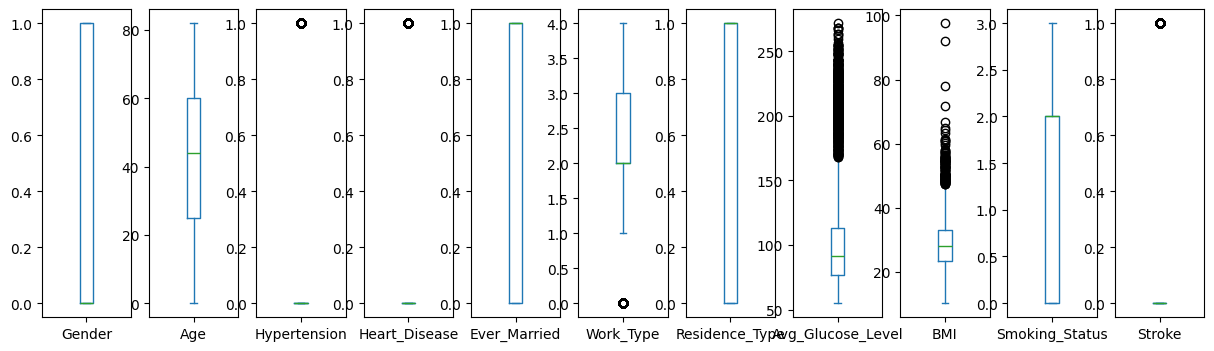

In [33]:
dfc.plot(kind = "box", figsize = (15,4), subplots = True)

# HeatMap

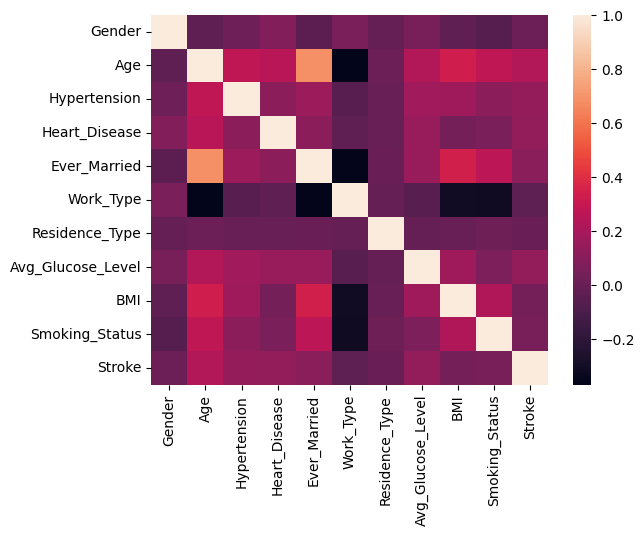

In [34]:
corr_matrix = dfc.corr(method='pearson')
ax=sns.heatmap(corr_matrix)

In [35]:
target_corr = corr_matrix[['Stroke']]
target_corr

,Stroke
Gender,0.006904
Age,0.232313
Hypertension,0.142503
Heart_Disease,0.137929
Ever_Married,0.105051
Work_Type,-0.033763
Residence_Type,0.005988
Avg_Glucose_Level,0.138984
BMI,0.042341
Smoking_Status,0.051544


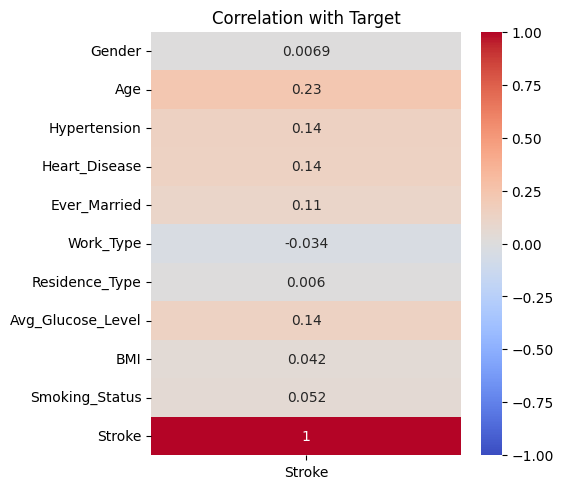

In [36]:
plt.figure(figsize=(5, len(target_corr)*0.5)) # adjust the size as needed
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target')
plt.show()

# Actuall Modeling

In [37]:
X_columns_list=[ 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married','Work_Type', 'Avg_Glucose_Level', 'BMI','Smoking_Status']

X, y = dfc[X_columns_list], dfc['Stroke']
X

,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Avg_Glucose_Level,BMI,Smoking_Status
0,67.0,0,1,1,2,228.69,36.6,1
2,80.0,0,1,1,2,105.92,32.5,2
3,49.0,0,0,1,2,171.23,34.4,3
4,79.0,1,0,1,3,174.12,24.0,2
5,81.0,0,0,1,2,186.21,29.0,1
...,...,...,...,...,...,...,...,...
5104,13.0,0,0,0,4,103.08,18.6,0
5106,81.0,0,0,1,3,125.20,40.0,2
5107,35.0,0,0,1,3,82.99,30.6,2
5108,51.0,0,0,1,2,166.29,25.6,1


In [38]:
SC = StandardScaler()
X = SC.fit_transform(X)
joblib.dump(SC, 'Standard_scaler.pkl')

['Standard_scaler.pkl']

In [39]:
def evaluate_models(X, y):
    results = []
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression(max_iter=1000)),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('Support Vector Machine', SVC()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ]

    # Evaluate each model
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((name, accuracy, precision, recall, f1))

    # Create a DataFrame to display results
    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='blue')
    display(df_styled)


In [40]:
evaluate_models(X,y)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.946029,0.894970,0.946029,0.919791
1,Decision Tree,0.916497,0.916497,0.916497,0.916497
2,Random Forest,0.945010,0.894918,0.945010,0.919282
3,Gradient Boosting,0.942974,0.894813,0.942974,0.918262
4,AdaBoost,0.946029,0.894970,0.946029,0.919791
5,Support Vector Machine,0.946029,0.894970,0.946029,0.919791
6,K-Nearest Neighbors,0.943992,0.894866,0.943992,0.918773
7,Naive Bayes,0.870672,0.922148,0.870672,0.892908
8,XGBoost,0.939919,0.902268,0.939919,0.918468


# Random Undersampling

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
rus = RandomUnderSampler(random_state=42)
X_unsampled, y_unsampled = rus.fit_resample(X_train, y_train)

In [43]:
evaluate_models(X_unsampled, y_unsampled)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.761905,0.763946,0.761905,0.761182
1,Decision Tree,0.698413,0.698765,0.698413,0.698413
2,Random Forest,0.793651,0.800746,0.793651,0.792077
3,Gradient Boosting,0.761905,0.768092,0.761905,0.760089
4,AdaBoost,0.793651,0.808252,0.793651,0.790692
5,Support Vector Machine,0.809524,0.820652,0.809524,0.807483
6,K-Nearest Neighbors,0.714286,0.727950,0.714286,0.708995
7,Naive Bayes,0.761905,0.763946,0.761905,0.761182
8,XGBoost,0.730159,0.741199,0.730159,0.726289


# Random Oversampling

In [44]:
ros = RandomOverSampler(random_state=42)
X_ovsampled, y_ovsampled = ros.fit_resample(X, y)

In [45]:
evaluate_models(X_ovsampled, y_ovsampled)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.788298,0.788382,0.788298,0.788212
1,Decision Tree,0.975532,0.976653,0.975532,0.975506
2,Random Forest,0.990426,0.990602,0.990426,0.990423
3,Gradient Boosting,0.871809,0.878421,0.871809,0.871052
4,AdaBoost,0.768085,0.776813,0.768085,0.765657
5,Support Vector Machine,0.825000,0.825922,0.825000,0.824752
6,K-Nearest Neighbors,0.945745,0.950965,0.945745,0.945527
7,Naive Bayes,0.762766,0.763555,0.762766,0.762742
8,XGBoost,0.986702,0.987040,0.986702,0.986696


# SMOTE 

In [46]:
smote = SMOTE(random_state=42)
X_smsampled, y_smsampled = smote.fit_resample(X, y)

In [47]:
evaluate_models(X_smsampled, y_smsampled)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.789362,0.789348,0.789362,0.789341
1,Decision Tree,0.912234,0.912271,0.912234,0.912221
2,Random Forest,0.950000,0.950147,0.950000,0.949986
3,Gradient Boosting,0.886702,0.886746,0.886702,0.886682
4,AdaBoost,0.810106,0.822232,0.810106,0.807834
5,Support Vector Machine,0.833511,0.835291,0.833511,0.833135
6,K-Nearest Neighbors,0.915957,0.924933,0.915957,0.915382
7,Naive Bayes,0.772872,0.772877,0.772872,0.772875
8,XGBoost,0.951596,0.951597,0.951596,0.951596


# After Show Many different technic of solve imbalance data the best one and try fit and training and save the model 

In [48]:
ros = RandomOverSampler(random_state=42)
X_ovsampled, y_ovsampled = ros.fit_resample(X, y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_ovsampled, y_ovsampled, test_size=0.2, random_state=42)


    
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Result of Random Forest Classifier:-")
print("Accuracy : "+str(accuracy))
print("precision : "+str(precision))
print("recall : "+str(recall)  )
print("f1 : "+str(f1))

Result of Random Forest Classifier:-
Accuracy : 0.9909574468085106
precision : 0.9825641025641025
recall : 1.0
f1 : 0.9912053802379721


In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[905  17]
 [  0 958]]


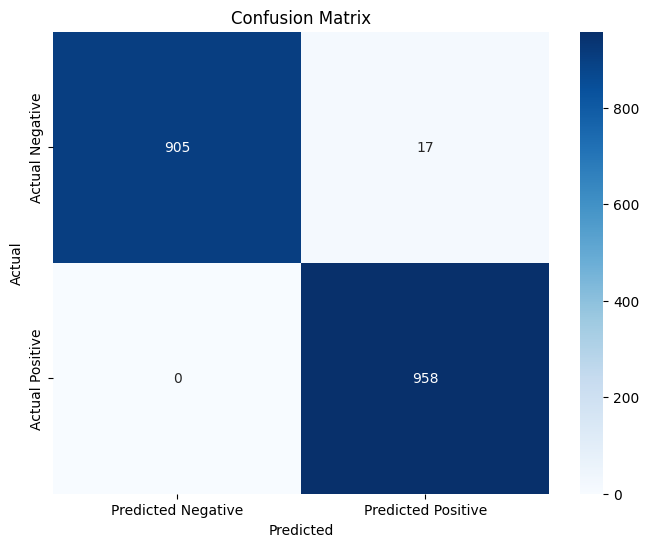

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [52]:
with open('StrokeModelRandomForest','wb') as file: # write binary 
    pickle.dump(model,file) # put model into file

In [63]:
from sklearn.metrics import (
    classification_report, roc_auc_score, precision_recall_curve, auc,
    roc_curve
)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       922
           1       0.98      1.00      0.99       958

    accuracy                           0.99      1880
   macro avg       0.99      0.99      0.99      1880
weighted avg       0.99      0.99      0.99      1880

